In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [8]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [9]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, IP,downstream_YAG, crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 360.00034418370416 microns
FWHM in y: 360.00034418370416 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414876966694455
5.414876966694455
b 1.00
b 1.64
b 0.61
b 1.00
0.6102211874545929
19.86913187055027
19.869131870550262
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [10]:
print(crystal2.alpha)

0.43404492398595806


In [11]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.2595306524099044
0.03060251960041145
0.3467890417726059


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -9.15
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: -3.71
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: 12.30
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
dr

<IPython.core.display.Javascript object>


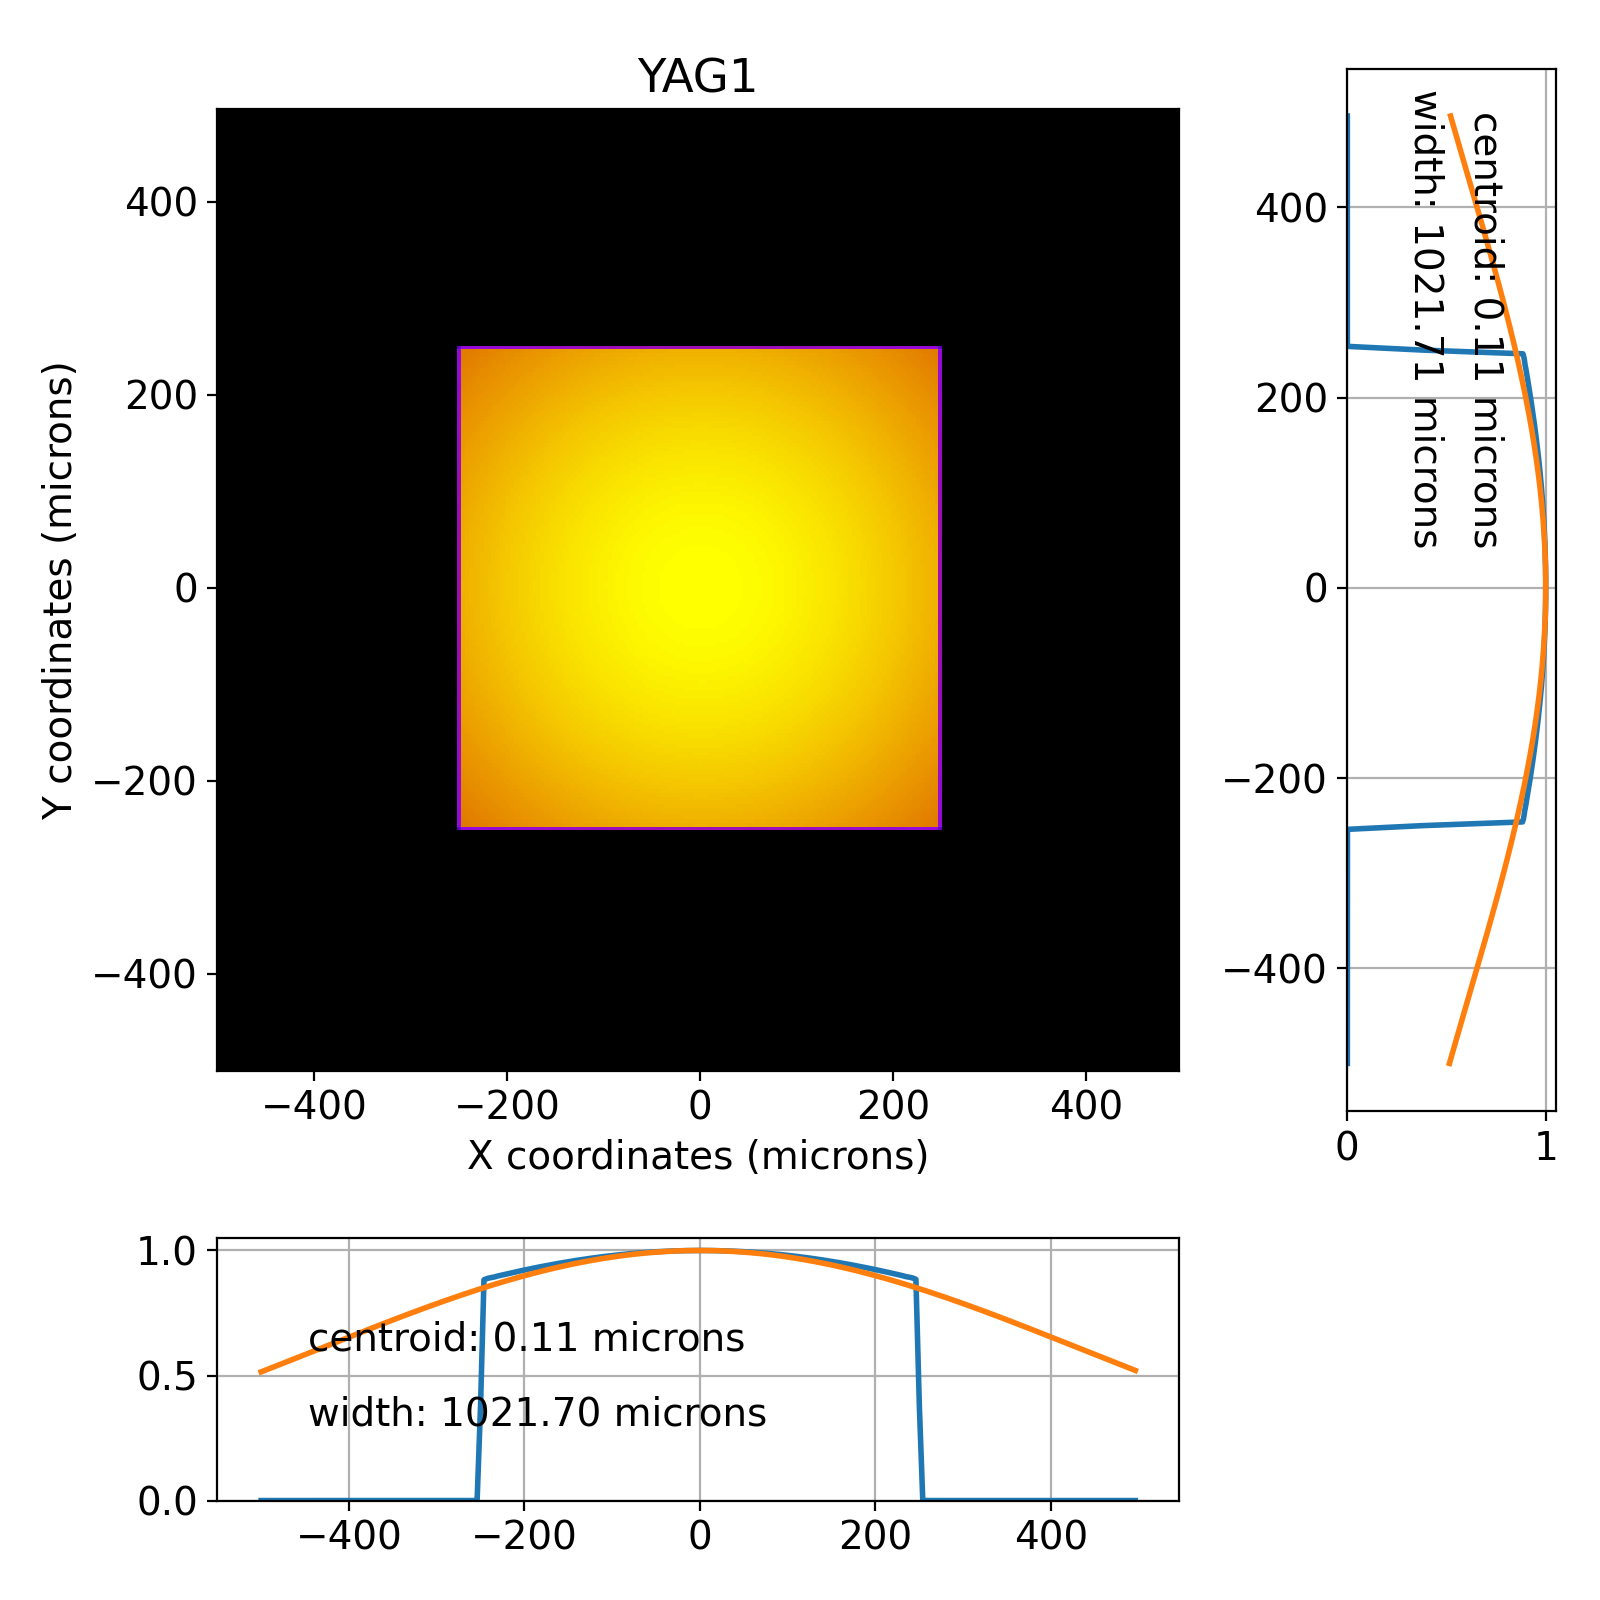

<IPython.core.display.Javascript object>


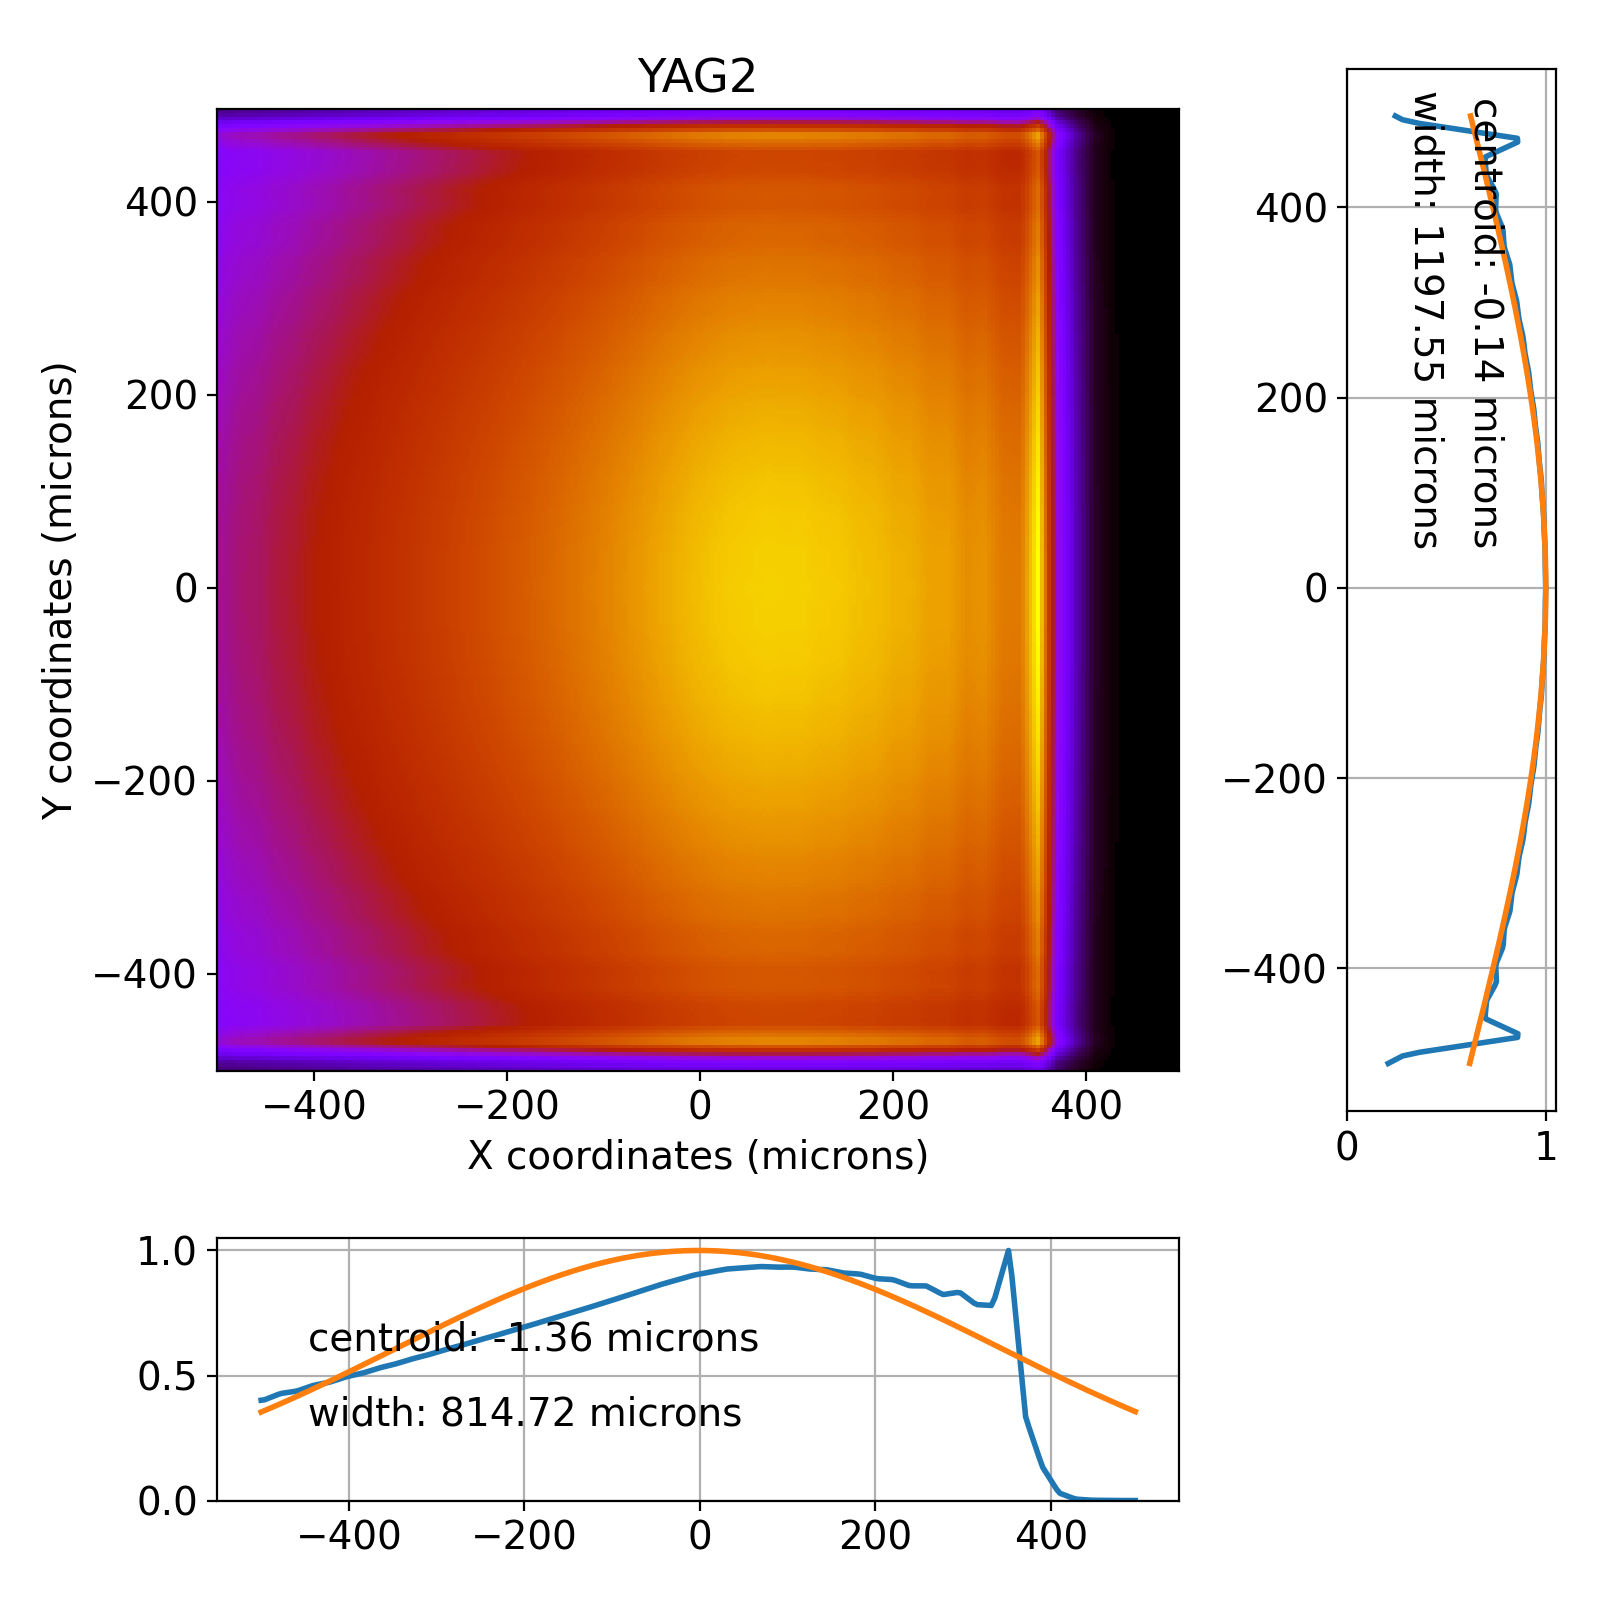

<IPython.core.display.Javascript object>


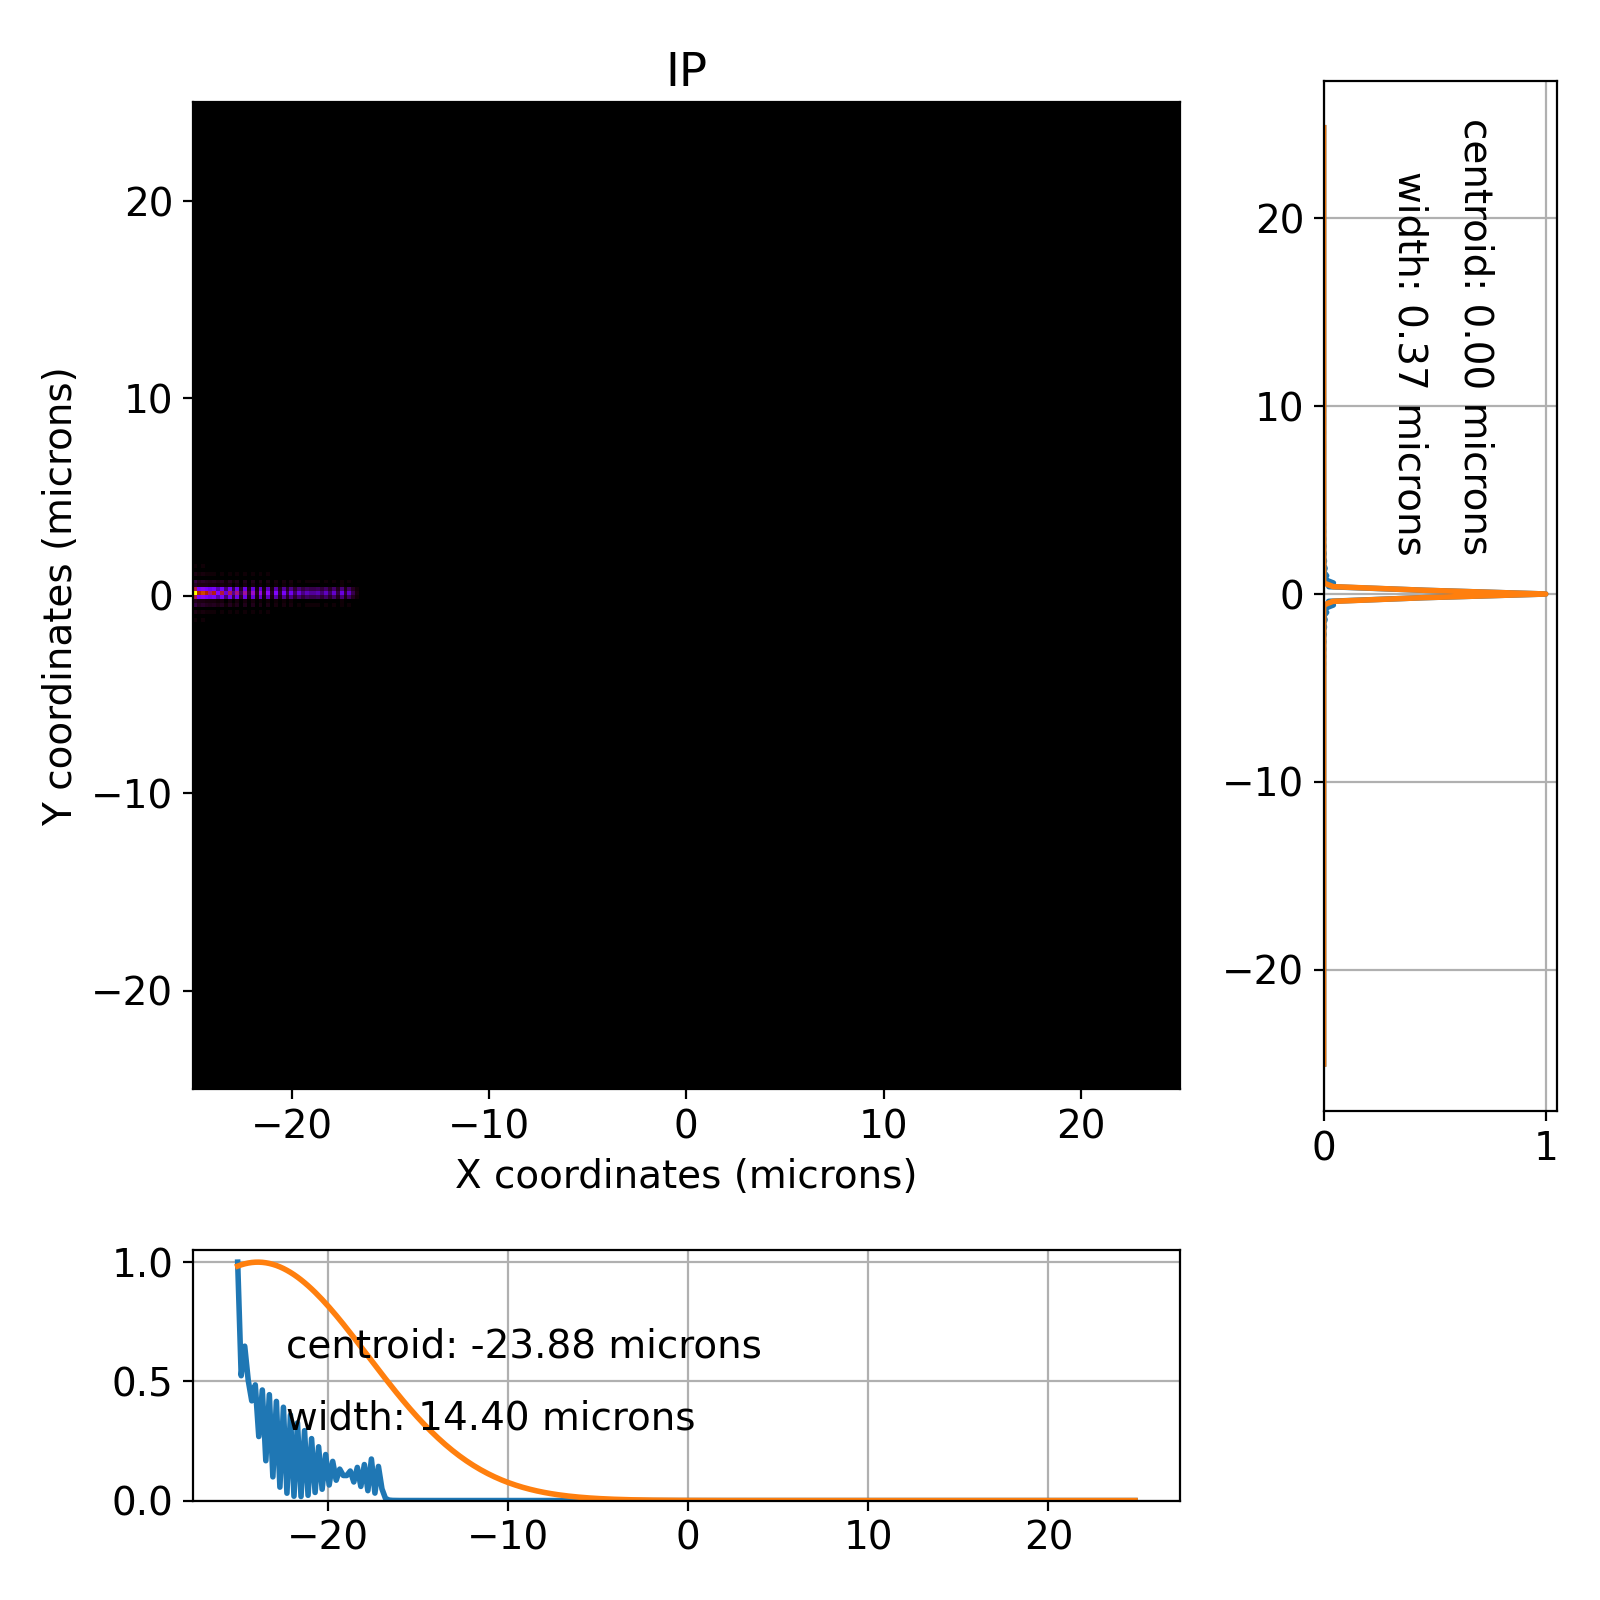

<IPython.core.display.Javascript object>


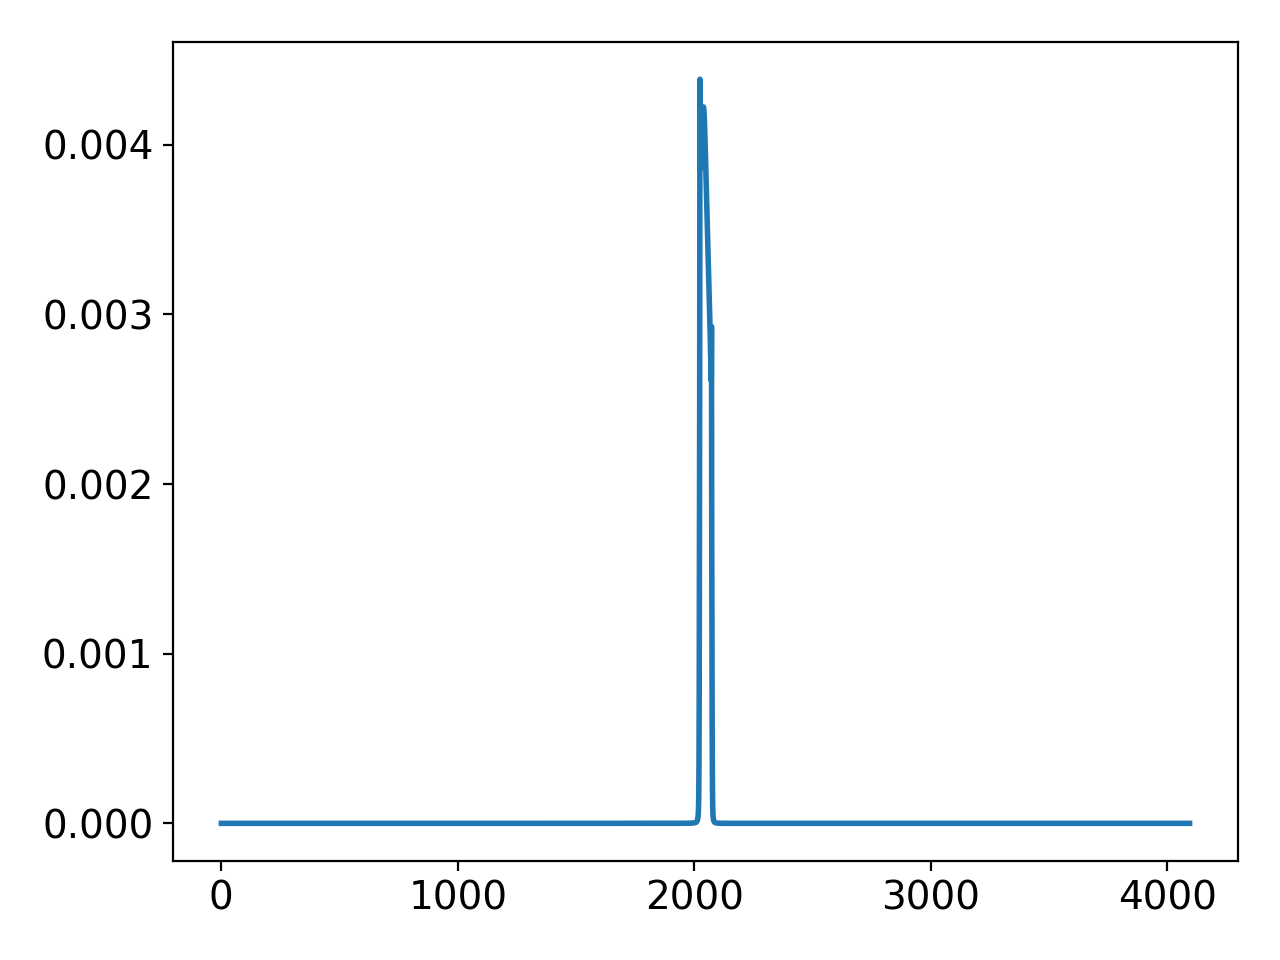

In [12]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [13]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

In [14]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG2','IP'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.64
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.26
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.86
zx: 

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9970685647248 microns
FWHM in y: 359.9970685647248 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414926356138518
5.414926356138518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9961268162513 microns
FWHM in y: 359.9961268162513 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414940555891518
5.414940555891518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60

zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9951850727229 microns
FWHM in y: 359.9951850727229 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414954755644519
5.414954755644519
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00


zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9939294223773 micr

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mr

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9920459633423 micr

zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9911042412422 microns
FWHM in y: 359.9911042412422 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415016287907521
5.415016287907521
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29

focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99016252408717 microns
FWHM in y: 359.99016252408717 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150304876605215
5.4150304876605215
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx:

zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9892208118768 microns
FWHM in y: 359.9892208118768 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415044687413522
5.415044687413522
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad

zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.98827910461137 microns
FWHM in y: 359.98827910461137 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415058887166522
5.415058887166522
mr1l0
zx: 110.0

zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98733740229073 microns
FWHM in y: 359.98733740229073 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415073086919522
5.415073086919522
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.

zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9863957049146 microns
FWHM in y: 359.9863957049146 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415087286672523
5.415087286672523
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00


FWHM in x: 359.9856109608785 microns
FWHM in y: 359.9856109608785 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415099119800025
5.415099119800025
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 

zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta

zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9837275892018 microns
FWHM in y: 359.9837275892018 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415127519306024
5.415127519306024
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9827859107802 microns
FWHM in y: 359.9827859107802 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415141719059026
5.415141719059026
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9818442373034 microns
FWHM in y: 359.9818442373034 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415155918812025
5.415155918812025
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59

zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.98090256877094 microns
FWHM in y: 359.98090256877094 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415170118565024
5.415170118565024
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.27
zy: 360.13
azimut

zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97996090518285 microns
FWHM in y: 359.97996090518285 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415184318318027
5.415184318318027
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.27
zy: 360.13
azimut

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.30
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9

FWHM in x: 359.9780775928404 microns
FWHM in y: 359.9780775928404 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415212717824026
5.415212717824026
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 

zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: 

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.

zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0

FWHM in x: 359.9714861553865 microns
FWHM in y: 359.9714861553865 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415312116095029
5.415312116095029
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360

zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9705445412411 microns
FWHM in y: 359.9705445412411 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415326315848031
5.415326315848031
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.0

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.96819052750794 microns
FWHM in y: 359.96819052750794 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415361815230531
5.415361815230531
mr1l0
zx: 110.00
zy: 110.00
azi

zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9672489306666 microns
FWHM in y: 359.9672489306666 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415376014983532
5.415376014983532
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimu

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04


zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx:

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta

zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.96238409241164 microns
FWHM in y: 359.96238409241164 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415449380374033
5.415449380374033
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mra

zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.96144252605694 microns
FWHM in y: 359.96144252605694 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415463580127035
5.415463580127035
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.5

zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9605009646462 microns
FWHM in y: 359.9605009646462 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415477779880035
5.415477779880035
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 

FWHM in x: 359.959559408179 microns
FWHM in y: 359.959559408179 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4154919796330345
5.4154919796330345
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.957519386126 microns
FWHM in y: 359.957519386126 microns
FWHM Divergence (x): 

zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9565778453134 microns
FWHM in y: 359.9565778453134 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415536945517537
5.415536945517537
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimu

zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9556363094443 microns
FWHM in y: 359.9556363094443 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415551145270537
5.415551145270537
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.0

FWHM in x: 359.9546947785186 microns
FWHM in y: 359.9546947785186 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415565345023537
5.415565345023537
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04


zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.95265481180473 microns
FWHM in y: 359.95265481180473 microns
FWHM Divergence (

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
z

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04


zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94810420045144 microns
FWHM in y: 359.94810420045144 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415664743294541
5.415664743294541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0

zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94716270907185 microns
FWHM in y: 359.94716270907185 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415678943047541
5.415678943047541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mra

zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9462212226353 microns
FWHM in y: 359.9462212226353 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415693142800541
5.415693142800541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimu

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx:

FWHM in x: 359.9444951770065 microns
FWHM in y: 359.9444951770065 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415719175681042
5.415719175681042
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.0

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94120004512195 microns
FWHM in y: 359.94120004512195 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157688748165445
5.4157688748165445
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.2

zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94025858999055 microns
FWHM in y: 359.94025858999055 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157830745695446
5.4157830745695446
mr1l0
zx: 110.00
zy: 110.00
a

zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9393171398021 microns
FWHM in y: 359.9393171398021 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157972743225455
5.4157972743225455
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift

zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9383756945565 microns
FWHM in y: 359.9383756945565 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415811474075546
5.415811474075546
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 

zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9374342542534 microns
FWHM in y: 359.9374342542534 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415825673828546
5.415825673828546
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx:

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx:

zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9353944838864 microns
FWHM in y: 359.9353944838864 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415856439960046
5.415856439960046
mr1l0
zx: 110.00
zy: 110.00
azimu

focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93445305923507 microns
FWHM in y: 359.93445305923507 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415870639713047
5.415870639713047
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 35

FWHM in x: 359.9335116395263 microns
FWHM in y: 359.9335116395263 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415884839466048
5.415884839466048
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9324133227795 microns
FWHM in y: 359.9324133227795 microns
FWHM Divergence (x)

zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93147191377955 microns
FWHM in y: 359.93147191377955 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415915605597548
5.415915605597548
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9305305097219 microns
FWHM in y: 359.9305305097219 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415929805350549
5.415929805350549
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth 693.55 

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx:

zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.92864771643394 microns
FWHM in y: 359.92864771643394 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415958204856549
5.415958204856549
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.54 mra

focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.92770632720345 microns
FWHM in y: 359.92770632720345 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41597240460955
5.41597240460955
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.

In [25]:
90+(248-205)

133

<IPython.core.display.Javascript object>


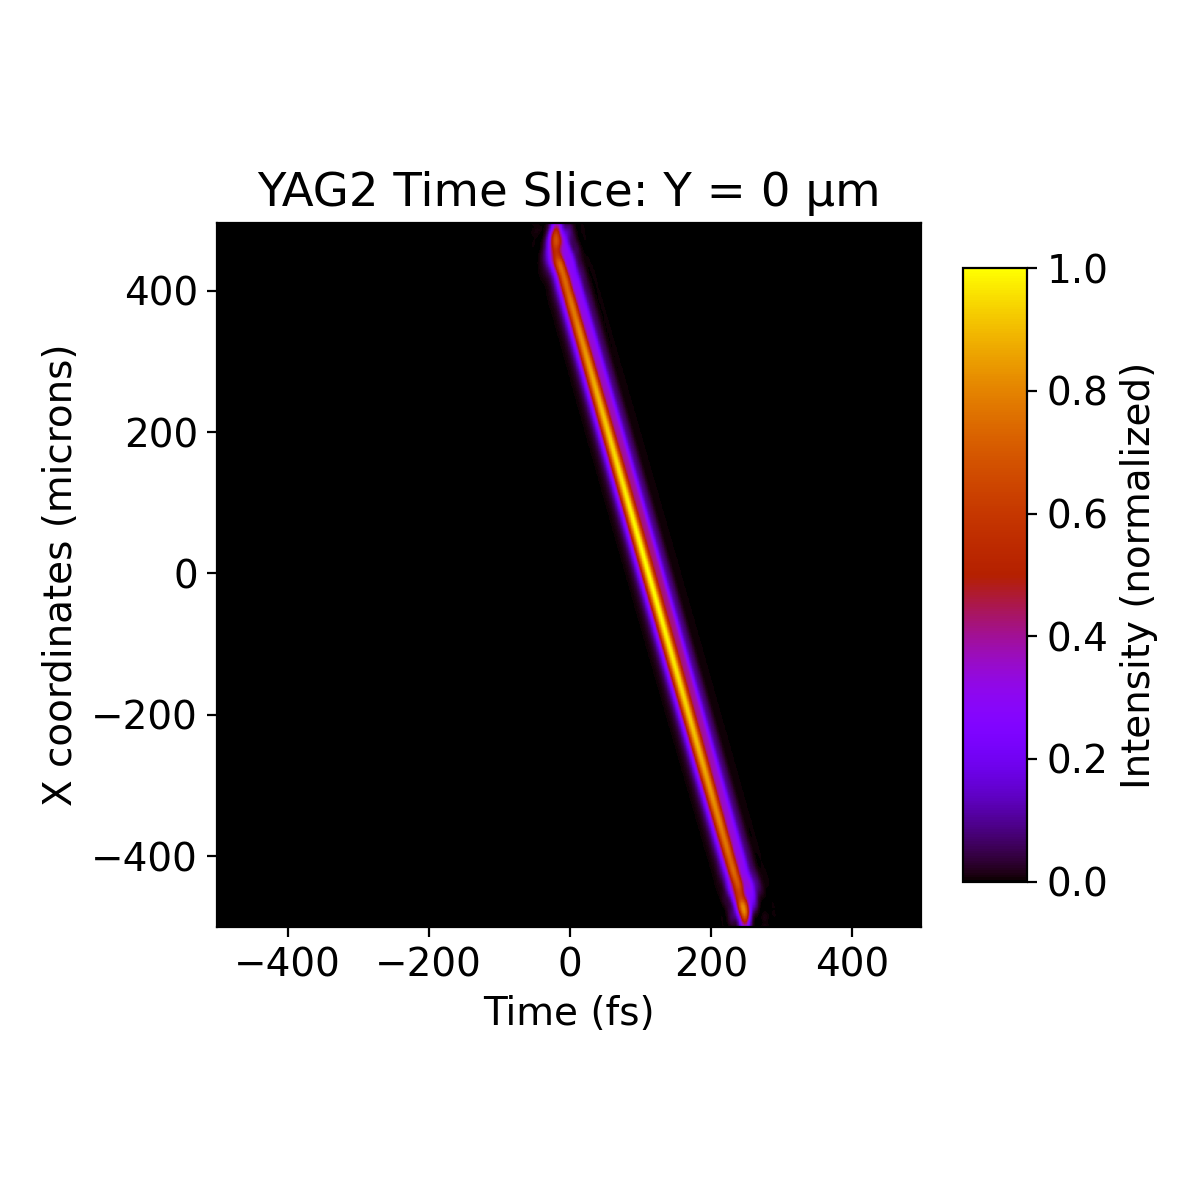

128


<IPython.core.display.Javascript object>


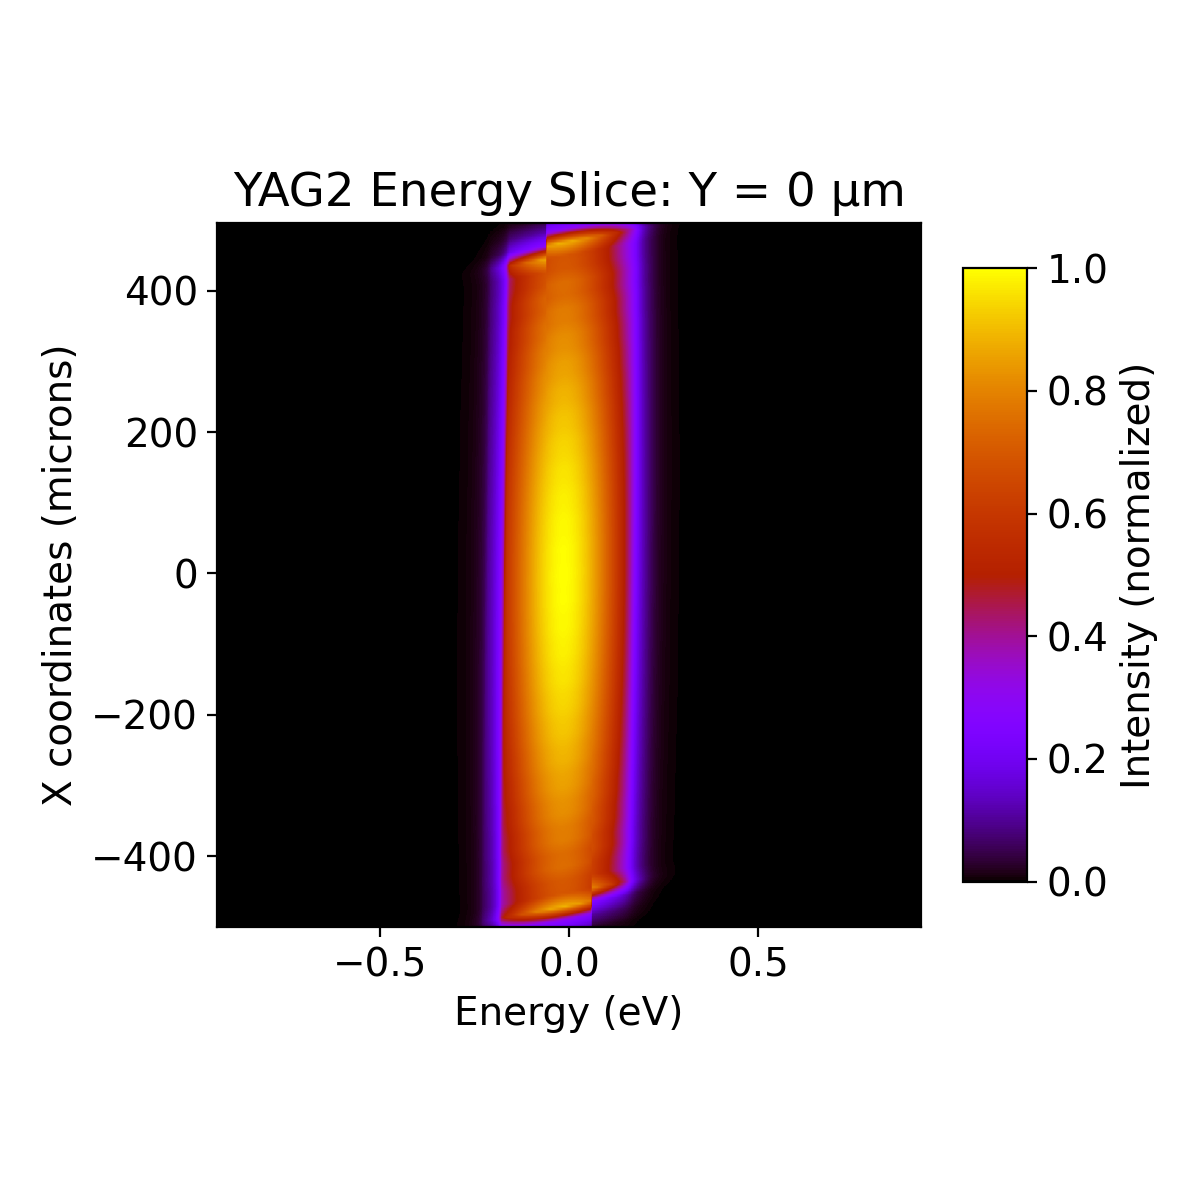

<IPython.core.display.Javascript object>


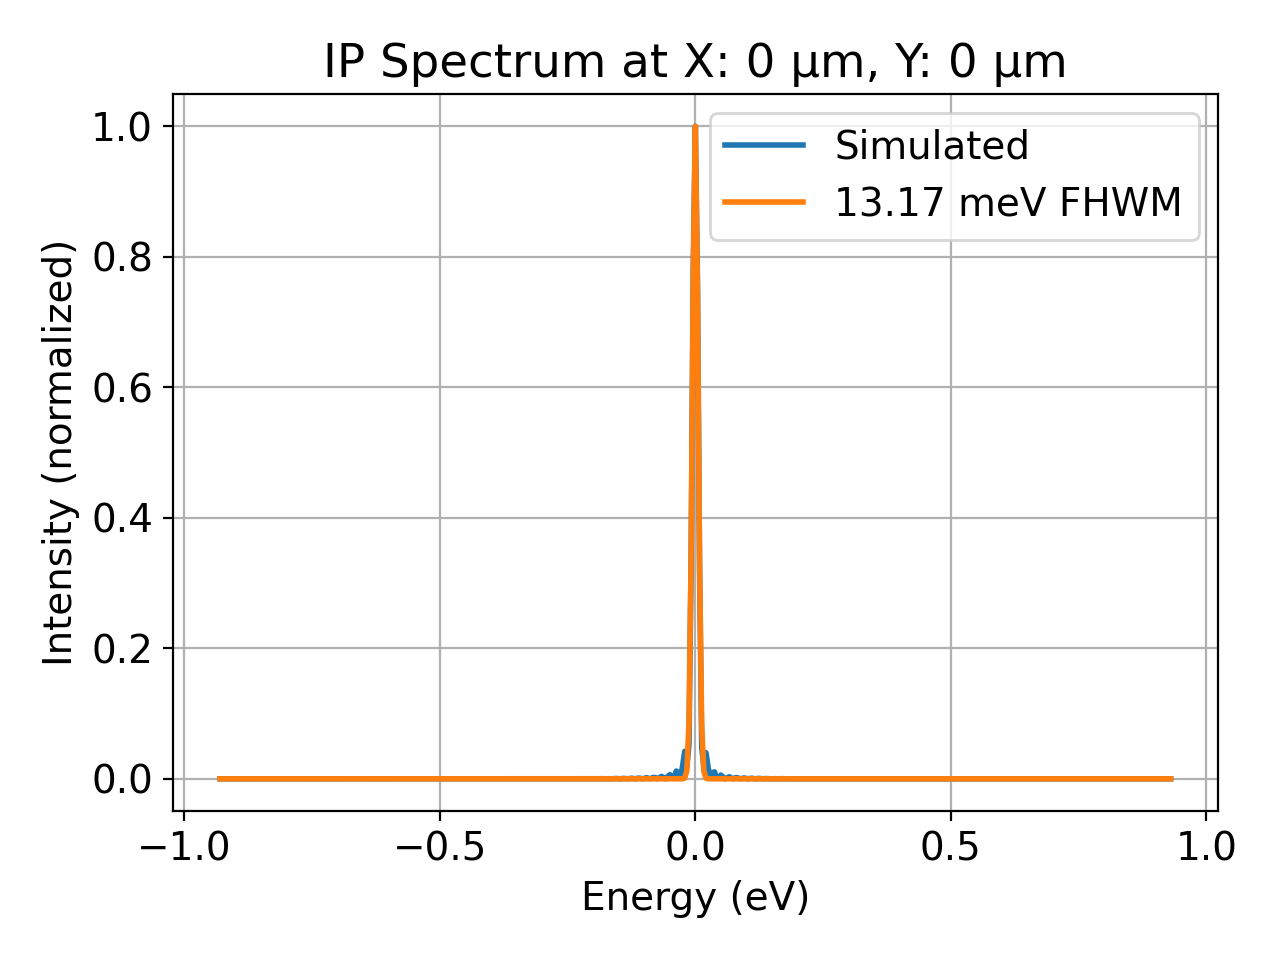

<IPython.core.display.Javascript object>


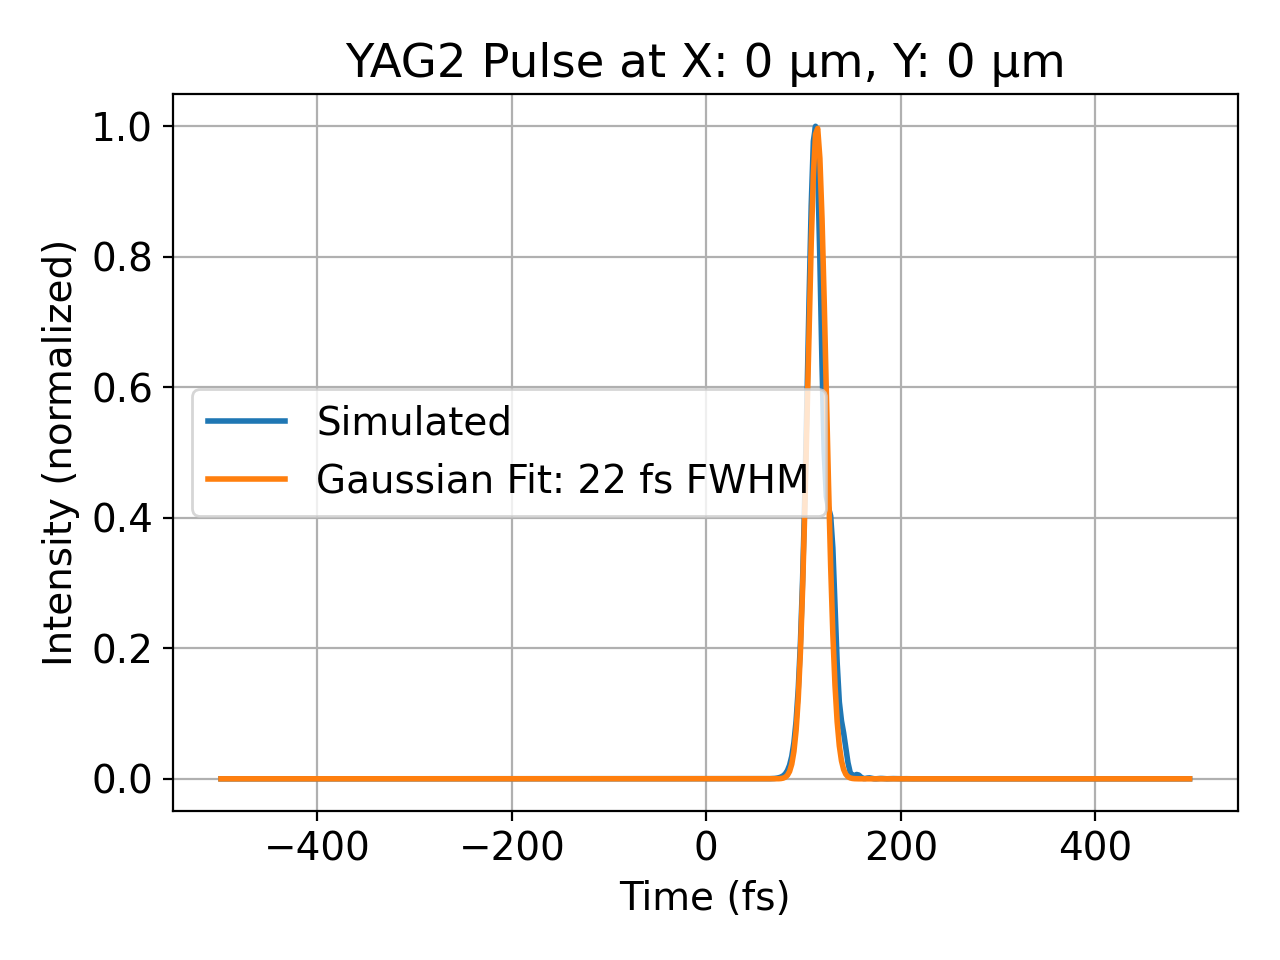

<IPython.core.display.Javascript object>


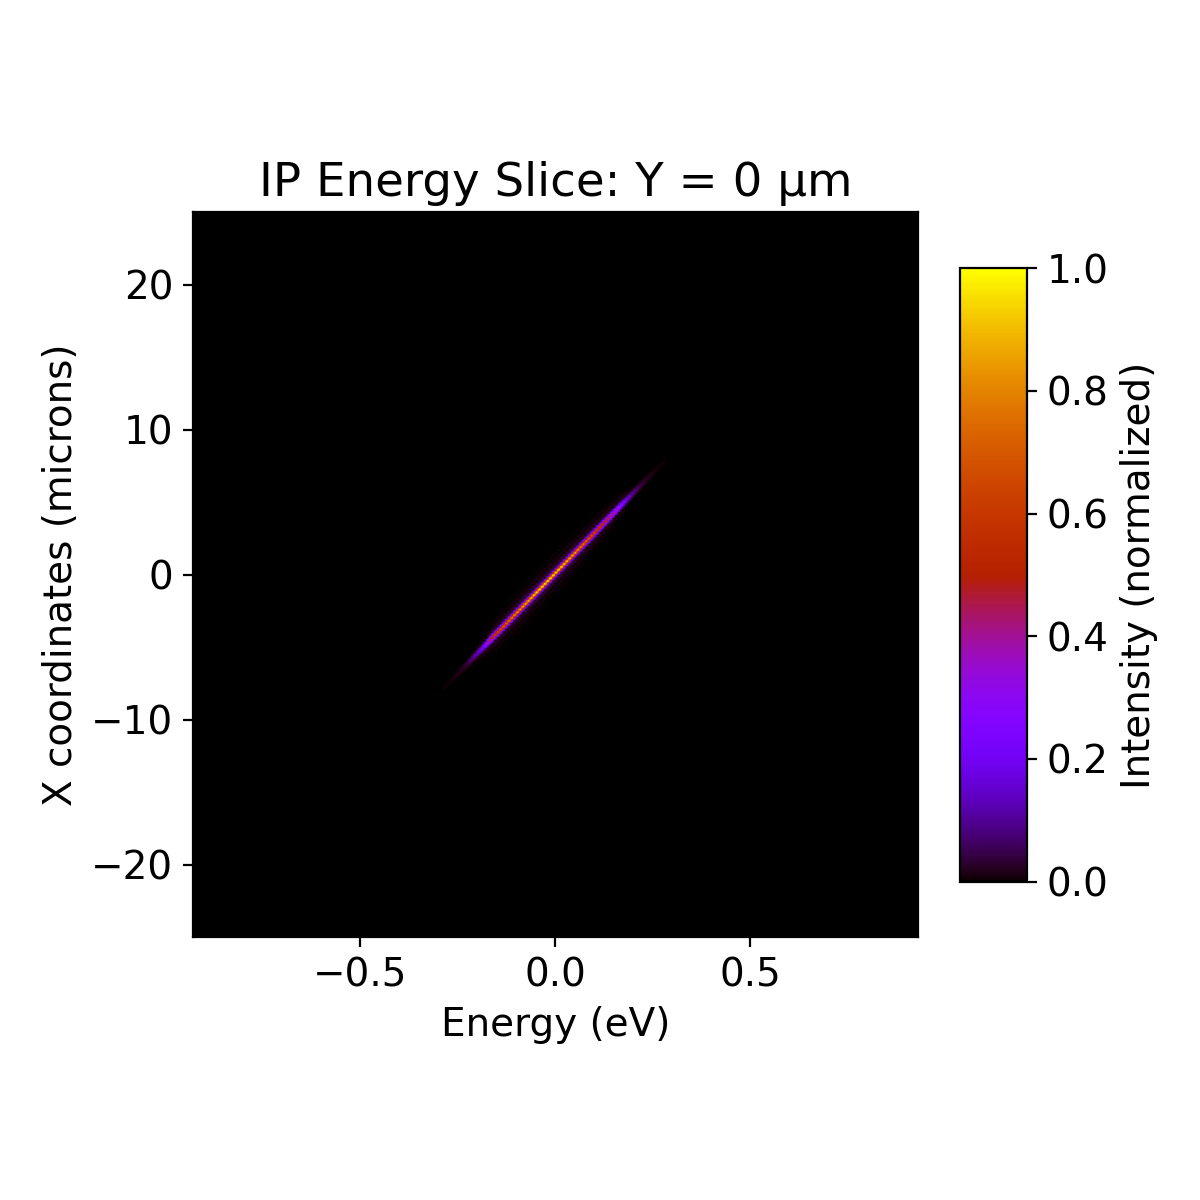

<IPython.core.display.Javascript object>


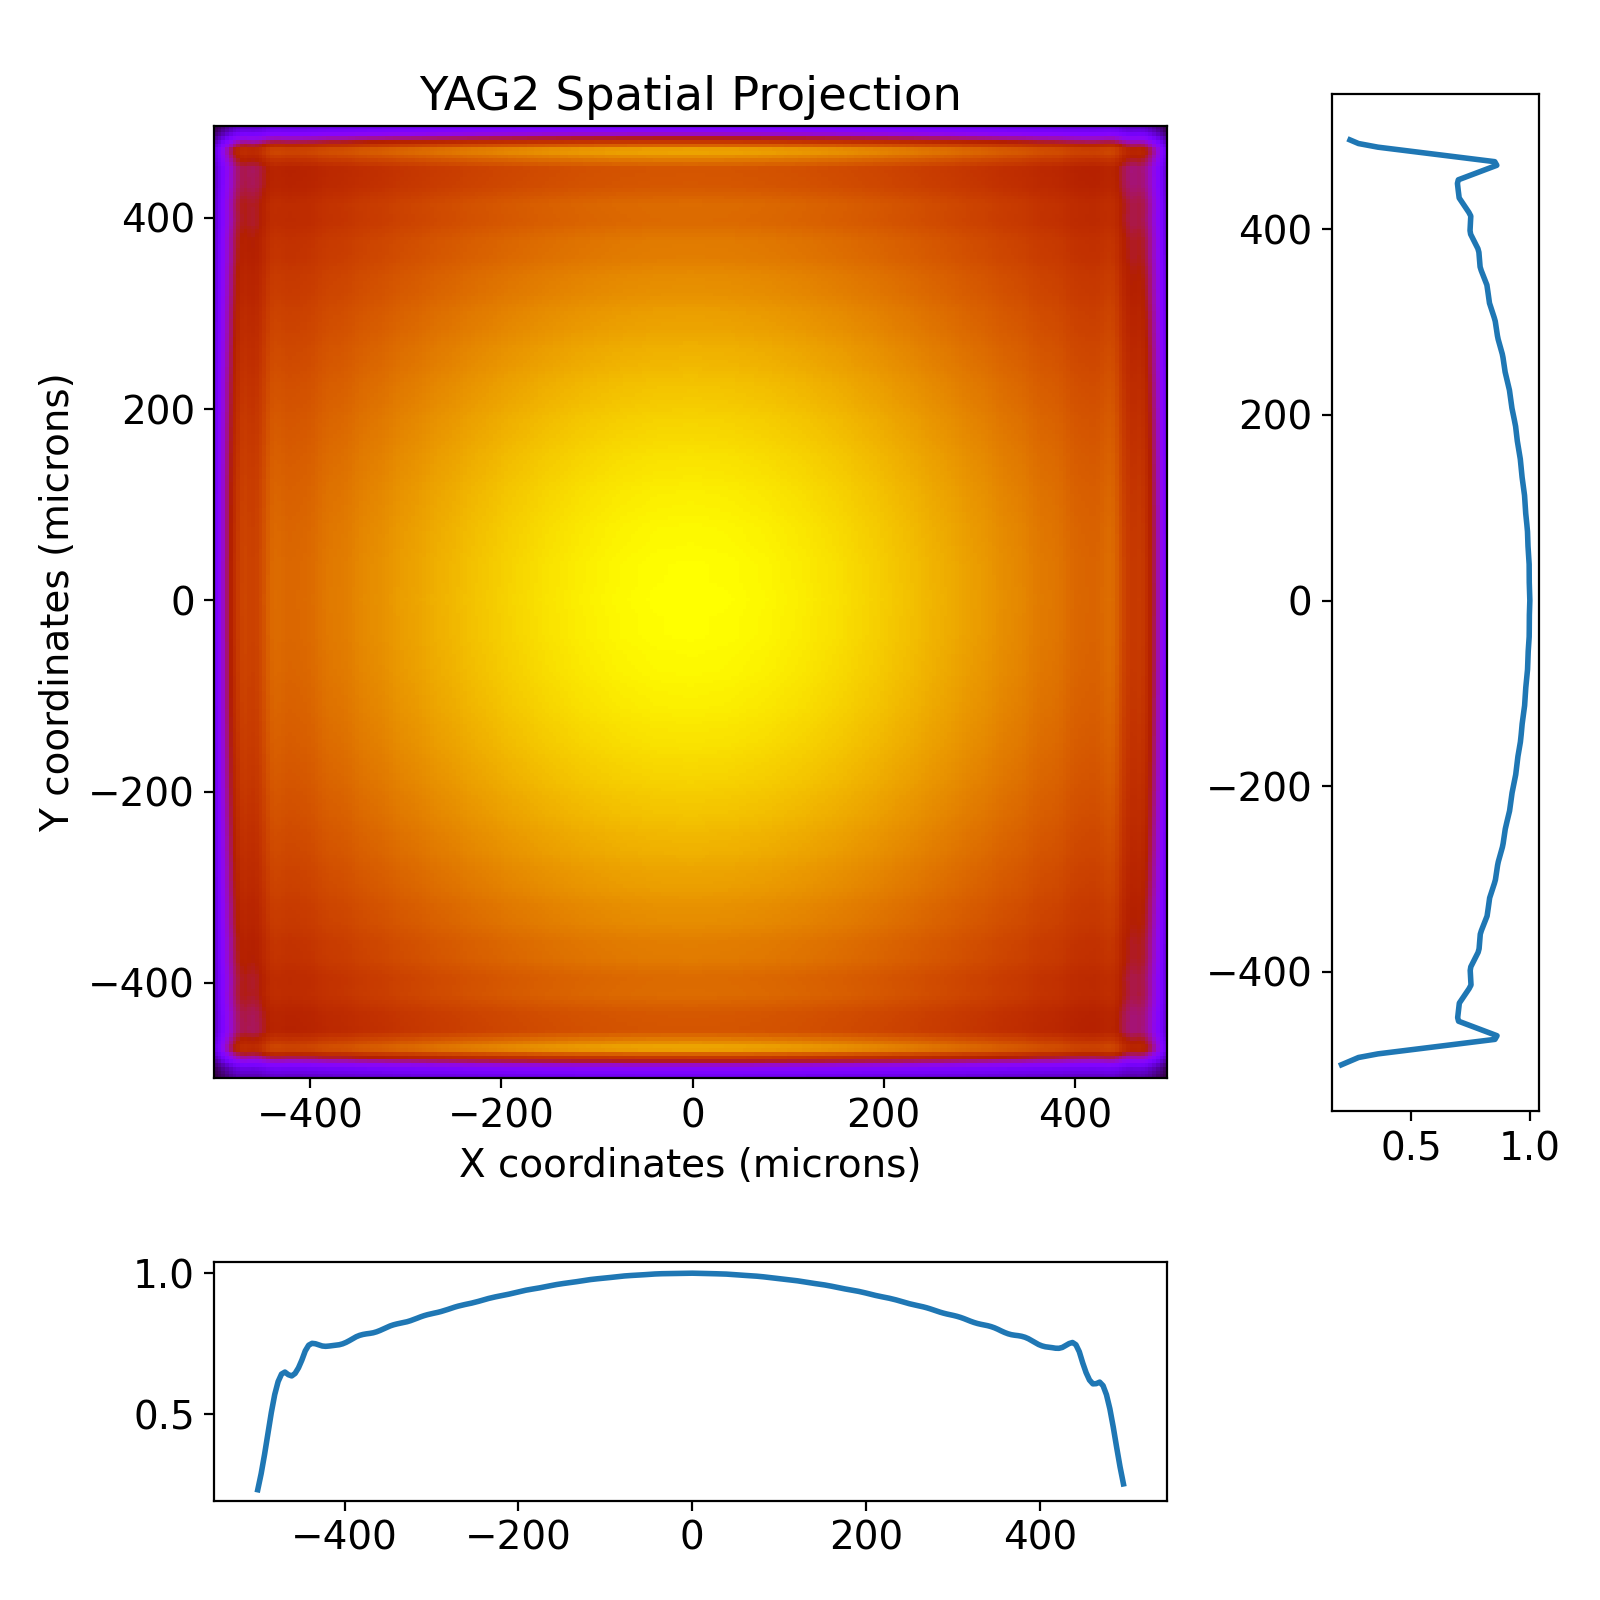

<IPython.core.display.Javascript object>


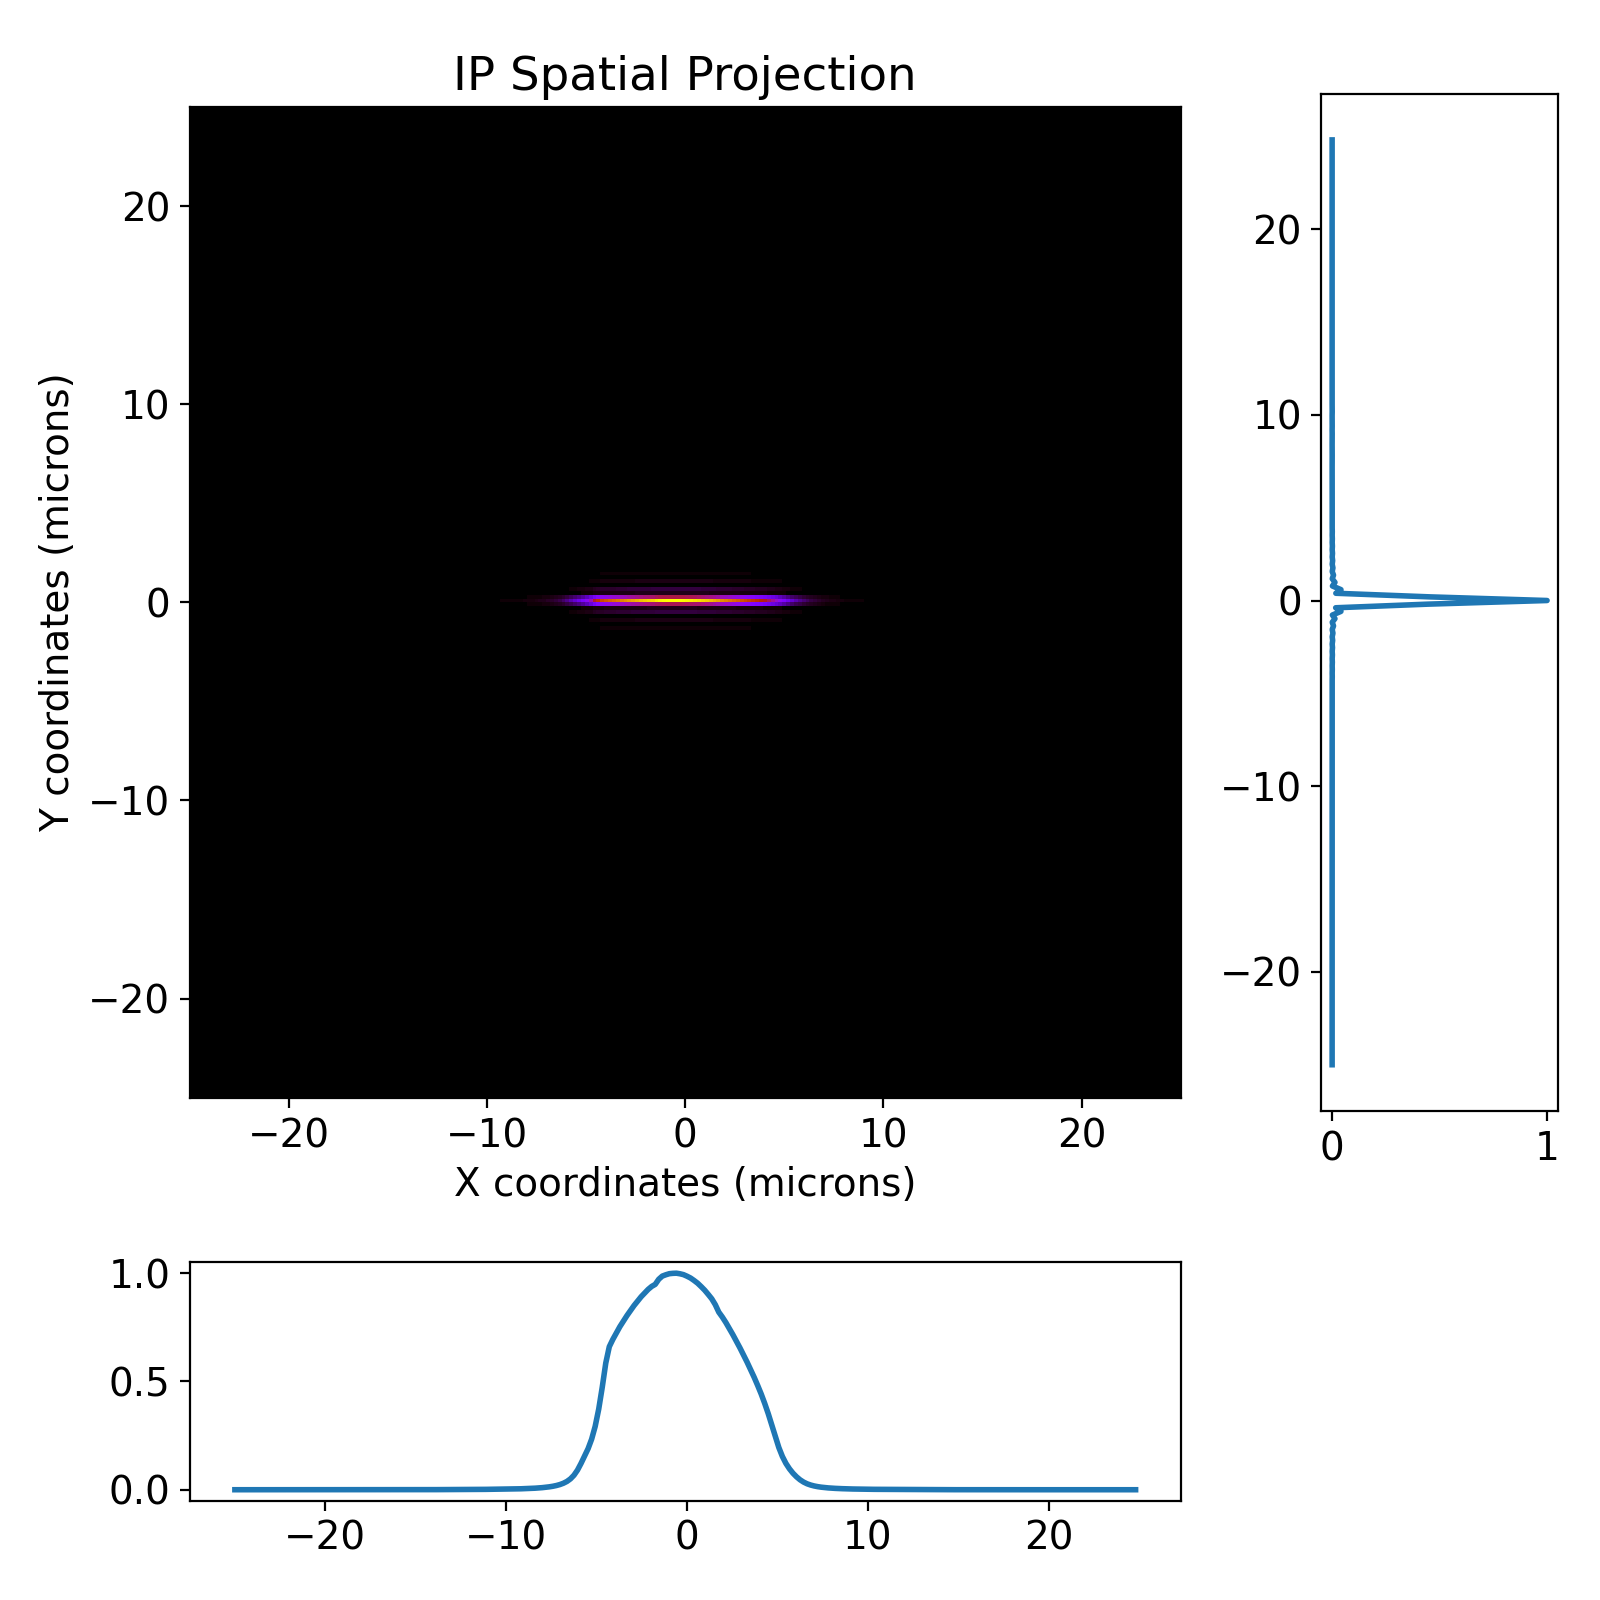

<IPython.core.display.Javascript object>


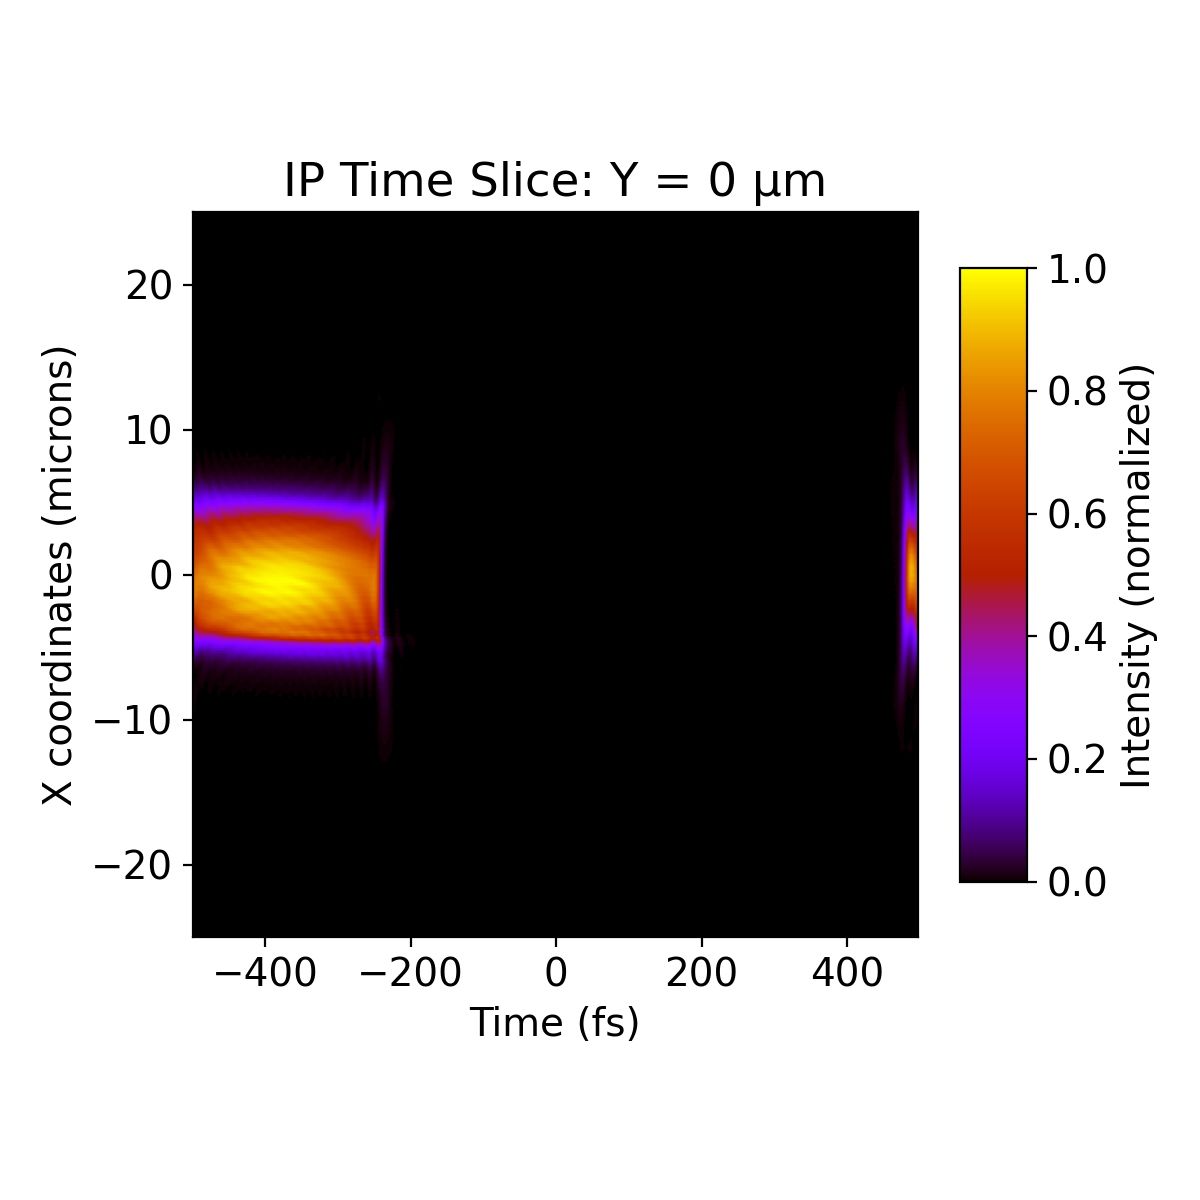

128


In [15]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('IP',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
pulse_test.imshow_projection('IP')
pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


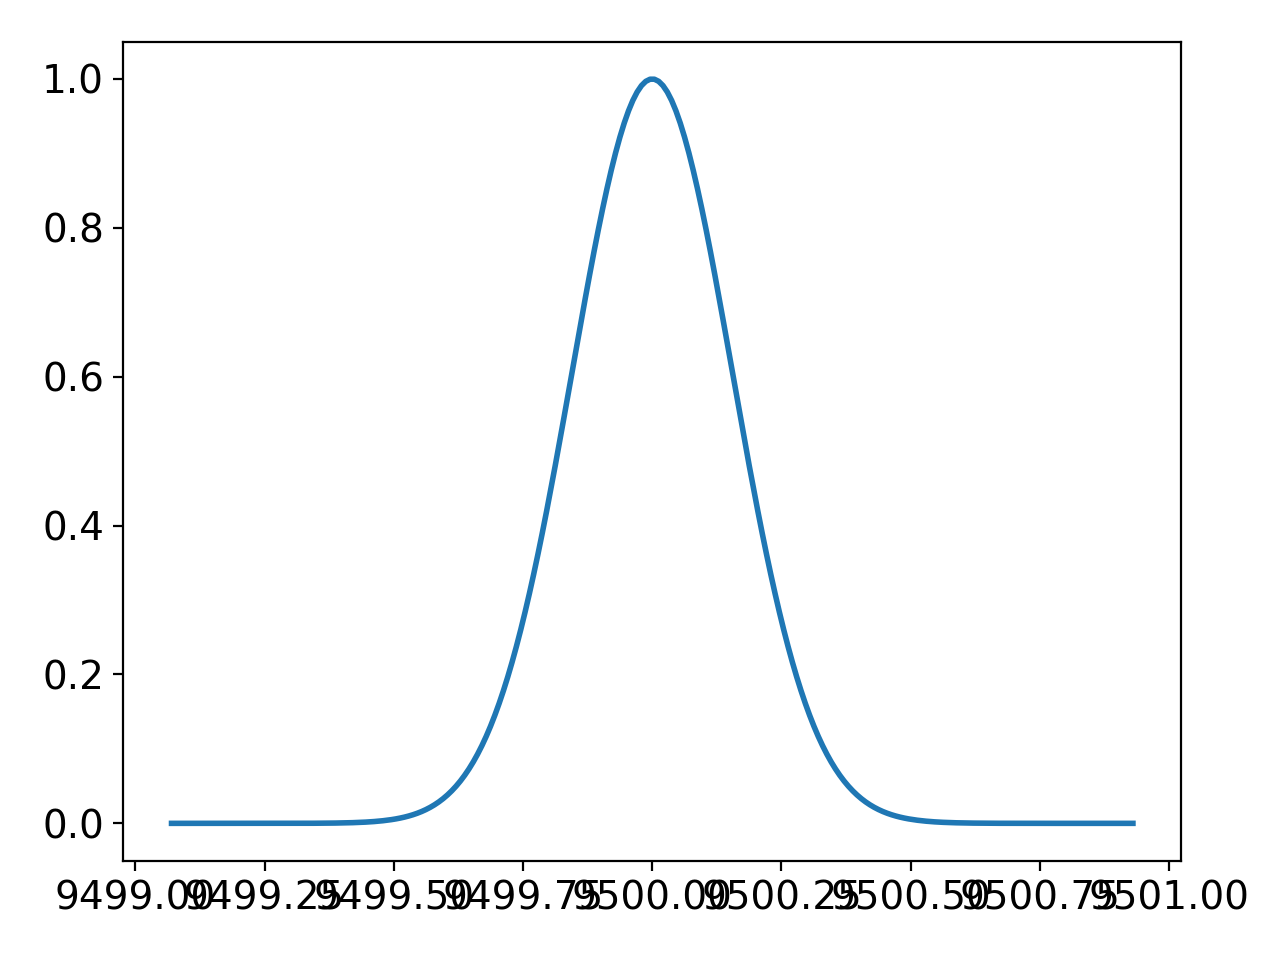

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8